# 02 - Data Preprocessing

This notebook covers:
- Dropping duplicates and null values
- Label encoding
- Text preprocessing (removing hyperlinks, punctuations, extra spaces)
- Word cloud visualization

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud
import warnings

warnings.filterwarnings('ignore')

## Load Data

In [2]:
df = pd.read_csv("/content/sample_data/Phishing_Email.csv")
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


## Drop Duplicates and Null Values

In [3]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)
df.dropna(inplace=True,axis=0)
df.drop_duplicates(inplace=True)

In [4]:
print("Dimension of the row data:",df.shape)

Dimension of the row data: (17538, 2)


In [5]:
df.isna().sum()

,0
Email Text,0
Email Type,0


In [6]:
df.head()

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email


## Integer Encoding

In [7]:
le = LabelEncoder()

df["Email Type"] = le.fit_transform(df["Email Type"])

In [8]:
df

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",1
1,the other side of * galicismos * * galicismo *...,1
2,re : equistar deal tickets are you still avail...,1
3,\nHello I am your hot lil horny toy.\n I am...,0
4,software at incredibly low prices ( 86 % lower...,0
...,...,...
18644,\nRick Moen a Ã©crit:> > I'm confused. I thou...,1
18645,date a lonely housewife always wanted to date ...,0
18646,request submitted : access request for anita ....,1
18647,"re : important - prc mtg hi dorn & john , as y...",1


## Remove Hyperlinks, Punctuations, Extra Spaces

In [10]:
import re

def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df["Email Text processed"] =df["Email Text"].apply(preprocess_text)

In [11]:
df.head()

,Email Text,Email Type,Email Text processed
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",1,re 6 1100 disc uniformitarianism re 1086 sex l...
1,the other side of * galicismos * * galicismo *...,1,the other side of galicismos galicismo is a sp...
2,re : equistar deal tickets are you still avail...,1,re equistar deal tickets are you still availab...
3,\nHello I am your hot lil horny toy.\n I am...,0,hello i am your hot lil horny toy i am the one...
4,software at incredibly low prices ( 86 % lower...,0,software at incredibly low prices 86 lower dra...


## Word Cloud of Unique Words

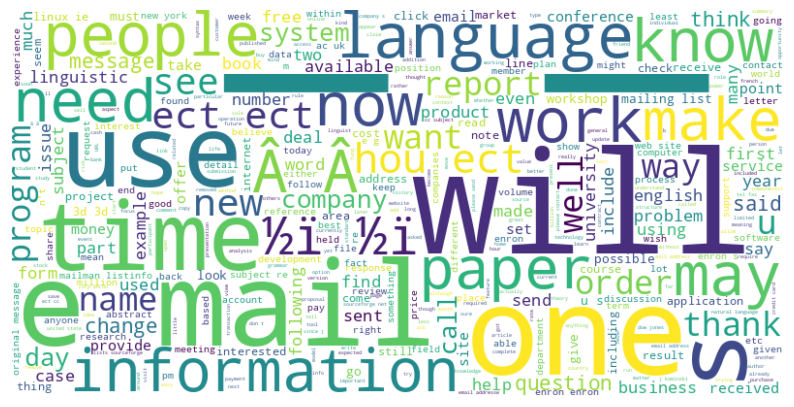

In [12]:
from wordcloud import WordCloud

all_mails = " ".join(df['Email Text'])

word_cloud = WordCloud(width=800,height=400,background_color='white',max_words=10000).generate(all_mails)
plt.figure(figsize=(10,6))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.show()

## Save Preprocessed Data

In [13]:
df.to_csv("Phishing_Email_Preprocessed.csv", index=False)
print("Preprocessed data saved successfully!")

Preprocessed data saved successfully!
